In [20]:
# Importing the Needed packages

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [21]:
#importing the dataset

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [22]:
# Selecting some needed features
cdf = df[["ENGINESIZE", "CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS" ]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


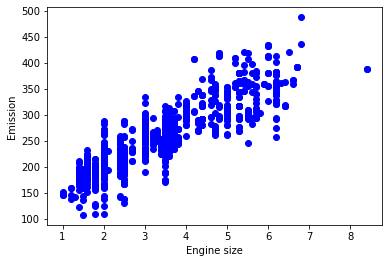

In [23]:
# Let plot emssions value with respect to engine size
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [24]:
# creating Train and Test Dataset

msk =np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

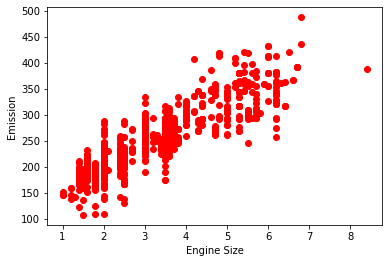

In [25]:
#Train Data Distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "red")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [26]:
# Modelling of Data

from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x_train, y_train)

# the coefficient
print("Coefiecent:", regr.coef_)

Coefiecent: [[10.55615933  8.10485548  9.21781532]]


In [27]:
### Predictions

from sklearn.metrics import r2_score
yhat = regr.predict(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB' ]]) 
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error (MSE) : %.2f"
      % np.mean((yhat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_train , y_train))

Mean Squared Error (MSE) : 549.21
Variance score: 0.86


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
# Practices

x_train = (train[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
x_test = (test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

In [31]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("Coeficient: ", regr.coef_)

Coeficient:  [[10.54059185  8.17057768  4.90303274  4.37031351]]


In [32]:
prediction = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

In [33]:
print('Residual sum of Squares: %.2f' % np.mean((prediction - y_test )**2 ))
print('Variance Score: %.2f' % regr.score(x_test, y_test))

Residual sum of Squares: 551.68
Variance Score: 0.87


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
